# Metadata of Lake CCI lakes

Data downloaded from: https://climate.esa.int/documents/2607/lakescci_v2.1.0_metadata.csv
- Downloaded on 2025-10-09
- Found at https://climate.esa.int/en/projects/lakes/ -> Data tab -> link within Data Coverage section

User guide for the data product: https://climate.esa.int/media/documents/CCI-LAKES2-0021-PUG-v2.1.1.pdf
- Found at https://climate.esa.int/en/projects/lakes/ -> Key Documents tab -> Phase 2 table -> link for Product User Guide
- Version 2.1.1 issued 2024-04-04

Differences between .csv and .shp files
- csv has snake_case headers, shp has mix of PascalCase and snake_case headers
- type count discrepancy:

|Type | csv | shp|
|---|-----|----|
|Lake | 1700| 1687|
|Reservoir |324| 324|
|TBC|0| 13|
|Total|2024|2024|

- lwe discrepancy:

|Cat | csv | shp|
|---|-----|----|
|great_0_5     |102|107|
|less_0_5      | 90|100|
|nan_sat       |258|258|
|nan_qc        |165|165 |
|nan_tba      |1409|1394|

- Consistent between csv and shp file
   - [x] lwl_data	
   - [-] lwe_data
   - [x] lswt_data	
   - [x] lic_data
   - [x] lwlr_data	

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Polygon, Point

In [3]:
__file__

NameError: name '__file__' is not defined

WindowsPath('c:/Users/schelian/OneDrive - Eawag/resetlakes_project/scratchwork_exporatory')

## Load and define data

In [ ]:
## Acronyms
var_name_dict = {'lwl':'Lake Water Level',
                 'lwe':'Lake Water Extent',
                 'lswt':'Lake Surface Water Temperature',
                 'lic':'Lake Ice Cover',
                 'lwlr':'Lake Water Leaving Reflectance'}

# My guess at the categories based on the website description. Needs to be assessed in some way.
data_cat_long_dict = {0:f'Data available at least 50% in most recent 16 years',
                 1:f'Data available less than 50% in most recent 16 years',
                 2:'No observations from satellites',
                 3:'No observations due to poor data quality or coverage',
                 4:'Lakes being considered for future data releases'}

data_cat_short_dict = {0:'great_0_5',
                 1:'less_0_5',
                 2:'nan_sat',
                 3:'nan_qc',
                 4:'nan_tba'}

: 

In [ ]:
lake_meta = gpd.read_file('shapefile/lakescci_v2.1.0_data-availability.shp')
lake_meta.set_index('id',inplace=True)
lake_meta.set_crs(4326,inplace=True)

,short_name,name,lat_centre,lon_centre,country,MaxDist,LatMinBox,LatMaxBox,LonMinBox,LonMaxBox,lwl_data,lwe_data,lswt_data,lic_data,lwlr_data,type,geometry
id,,,,,,,,,,,,,,,,,
2,GLWD00000002,Superior,"47,9625","-87,0431",United States;Canada,73.5,46.3708,49.0542,-92.2542,-84.3125,0,4,0,0,0,Lake,"MULTIPOLYGON (((-92.27778 46.65417, -92.27223 ..."
3,GLWD00000003,Victoria,"-0,8764","33,1431",Tanzania United Republic of;Uganda;Kenya,84.1,-3.0542,0.5292,31.5625,34.9042,0,4,0,0,0,Lake,"MULTIPOLYGON (((31.6986 -0.85555, 31.6986 -0.8..."
4,GLWD00000004,Large Aral Sea,"44,6486","59,8347",Uzbekistan;Kazakhstan,51.0,43.4708,46.8208,58.1708,61.8708,1,1,0,0,0,Lake,"MULTIPOLYGON (((58.43471 44.31667, 58.43332 44..."
5,GLWD00000005,Huron,"44,7208","-82,3458",Canada;United States,73.3,42.9625,46.5875,-84.8042,-79.6292,0,4,0,0,0,Lake,"MULTIPOLYGON (((-84.37778 45.98056, -84.37223 ..."
6,GLWD00000006,Michigan,"42,6042","-87,0153",United States,63.8,41.5792,46.1375,-88.0875,-84.7208,0,4,0,0,0,Lake,"MULTIPOLYGON (((-87.98334 44.66389, -87.98334 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300134644,HYLA00134644,Rihpojávri,"69,2125","20,6042",Norway,0.7,69.1542,69.2625,20.5375,20.6792,4,4,2,0,0,Lake,"MULTIPOLYGON (((20.59582 69.22917, 20.5986 69...."
300136326,HYLA00136326,None,"68,8208","59,0292",Russian Federation,1.5,68.7708,68.8792,58.9542,59.1208,2,2,0,0,0,Lake,"POLYGON ((59.04026 68.84306, 59.04026 68.84167..."
300140744,HYLA00140744,None,"67,4625","49,8458",Russian Federation,1.5,67.4042,67.5208,49.7542,49.9208,2,2,0,0,0,Lake,"POLYGON ((49.86249 67.48056, 49.86249 67.47917..."


: 

In [ ]:
lake_meta_df = pd.read_csv('lakescci_v2.1.0_metadata.csv',delimiter=';',index_col='id')

: 

In [ ]:
lake_meta.head(2)

,short_name,name,lat_centre,lon_centre,country,MaxDist,LatMinBox,LatMaxBox,LonMinBox,LonMaxBox,lwl_data,lwe_data,lswt_data,lic_data,lwlr_data,type,geometry
id,,,,,,,,,,,,,,,,,
2,GLWD00000002,Superior,"47,9625","-87,0431",United States;Canada,73.5,46.3708,49.0542,-92.2542,-84.3125,0,4,0,0,0,Lake,"MULTIPOLYGON (((-92.27778 46.65417, -92.27223 ..."
3,GLWD00000003,Victoria,"-0,8764","33,1431",Tanzania United Republic of;Uganda;Kenya,84.1,-3.0542,0.5292,31.5625,34.9042,0,4,0,0,0,Lake,"MULTIPOLYGON (((31.6986 -0.85555, 31.6986 -0.8..."


: 

## Define helper functions

In [ ]:
# 'LatMinBox', 'LatMaxBox', 'LonMinBox', 'LonMaxBox'
def polygon_from_bbox(minx,miny,maxx,maxy):
    coords_tuple = ((minx,miny),(maxx,miny),(maxx,maxy),(minx,maxy),(minx,miny))
    polygon = Polygon(coords_tuple)
    return polygon

: 

In [ ]:
def print_data_availability(pd_series):
    avail_count = pd_series.value_counts().sort_index()
    avail_frac = avail_count/avail_count.sum()
   
    print('Dataset count\n-----\n',avail_count.rename(index=data_cat_short_dict))
    print('\n')
    print('Dataset fraction\n-----\n',avail_frac.rename(index=data_cat_short_dict).round(4))
    print('\n')

: 

## Distributions of variables

In [ ]:
lake_meta.shape

(2024, 17)

: 

In [ ]:
# Lake type
type_count = lake_meta['type'].value_counts()
type_frac = type_count/type_count.sum()

print('Dataset count\n-----\n',type_count)
print('\n')
print('Dataset fraction\n-----\n',type_frac.round(3))

Dataset count
-----
 type
Lake         1687
Reservoir     324
TBC            13
Name: count, dtype: int64


Dataset fraction
-----
 type
Lake         0.833
Reservoir    0.160
TBC          0.006
Name: count, dtype: float64


: 

In [ ]:
print_data_availability(lake_meta['lwl_data'])

Dataset count
-----
 lwl_data
great_0_5     167
less_0_5      331
nan_sat       258
nan_qc        165
nan_tba      1103
Name: count, dtype: int64


Dataset fraction
-----
 lwl_data
great_0_5    0.0825
less_0_5     0.1635
nan_sat      0.1275
nan_qc       0.0815
nan_tba      0.5450
Name: count, dtype: float64




: 

In [ ]:
print_data_availability(lake_meta['lwe_data'])

Dataset count
-----
 lwe_data
great_0_5     107
less_0_5      100
nan_sat       258
nan_qc        165
nan_tba      1394
Name: count, dtype: int64


Dataset fraction
-----
 lwe_data
great_0_5    0.0529
less_0_5     0.0494
nan_sat      0.1275
nan_qc       0.0815
nan_tba      0.6887
Name: count, dtype: float64




: 

In [ ]:
print_data_availability(lake_meta['lswt_data'])


Dataset count
-----
 lswt_data
great_0_5    1929
nan_sat        12
nan_tba        83
Name: count, dtype: int64


Dataset fraction
-----
 lswt_data
great_0_5    0.9531
nan_sat      0.0059
nan_tba      0.0410
Name: count, dtype: float64




: 

In [ ]:
print_data_availability(lake_meta['lic_data'])

Dataset count
-----
 lic_data
great_0_5    2024
Name: count, dtype: int64


Dataset fraction
-----
 lic_data
great_0_5    1.0
Name: count, dtype: float64




: 

In [ ]:
print_data_availability(lake_meta['lwlr_data'])

Dataset count
-----
 lwlr_data
great_0_5    2024
Name: count, dtype: int64


Dataset fraction
-----
 lwlr_data
great_0_5    1.0
Name: count, dtype: float64




: 

Text(0.5, 0, 'Max distance to land')

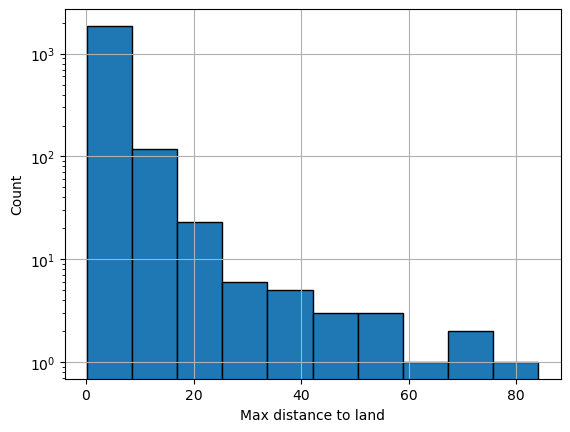

: 

In [ ]:
ax = lake_meta['MaxDist'].hist(log=True,edgecolor='black')
ax.set_ylabel('Count')
ax.set_xlabel('Max distance to land')

## Data queries / Lakes of interest

In [ ]:
lake_meta.sort_values(by='MaxDist',ascending=False).head(7)

,short_name,name,lat_centre,lon_centre,country,MaxDist,LatMinBox,LatMaxBox,LonMinBox,LonMaxBox,lwl_data,lwe_data,lswt_data,lic_data,lwlr_data,type,geometry
id,,,,,,,,,,,,,,,,,
3,GLWD00000003,Victoria,"-0,8764","33,1431",Tanzania United Republic of;Uganda;Kenya,84.1,-3.0542,0.5292,31.5625,34.9042,0,4,0,0,0,Lake,"MULTIPOLYGON (((31.6986 -0.85555, 31.6986 -0.8..."
2,GLWD00000002,Superior,"47,9625","-87,0431",United States;Canada,73.5,46.3708,49.0542,-92.2542,-84.3125,0,4,0,0,0,Lake,"MULTIPOLYGON (((-92.27778 46.65417, -92.27223 ..."
5,GLWD00000005,Huron,"44,7208","-82,3458",Canada;United States,73.3,42.9625,46.5875,-84.8042,-79.6292,0,4,0,0,0,Lake,"MULTIPOLYGON (((-84.37778 45.98056, -84.37223 ..."
6,GLWD00000006,Michigan,"42,6042","-87,0153",United States,63.8,41.5792,46.1375,-88.0875,-84.7208,0,4,0,0,0,Lake,"MULTIPOLYGON (((-87.98334 44.66389, -87.98334 ..."
16,GLWD00000016,Ladoga,"60,7653","31,6486",Russian Federation,56.3,59.8625,61.8208,29.7875,33.0042,0,4,0,0,0,Lake,"MULTIPOLYGON (((29.82638 61.20556, 29.82638 61..."
197,GLWD00000197,Kara-Bogaz-Gol,"41,3597","53,4681",Turkmenistan,53.2,40.5792,42.1958,52.6792,54.8375,0,0,0,0,0,Lake,"MULTIPOLYGON (((52.72221 41.61667, 52.72221 41..."
4,GLWD00000004,Large Aral Sea,"44,6486","59,8347",Uzbekistan;Kazakhstan,51.0,43.4708,46.8208,58.1708,61.8708,1,1,0,0,0,Lake,"MULTIPOLYGON (((58.43471 44.31667, 58.43332 44..."


: 

In [ ]:
def isolate_by_bbox_range(minx,miny,maxx,maxy,df):
    lat_range = (df['lat centre'] >= miny) & (df['lat centre'] <= maxy)
    lon_range = (df['lon centre'] >= minx) & (df['lon centre'] <= maxx)
    df_isolate = df.loc[lat_range*lon_range]
    return df_isolate

: 

In [ ]:
def isolate_by_country_name(country_name,df):
    df_isolate = df.loc[df['country'].str.contains(country_name)]
    return df_isolate

: 

In [ ]:
def isolate_by_latlon_point(latlon_tuple, df):
    lat_val = latlon_tuple[0]
    lon_val = latlon_tuple[1]
    lat_range = (df['lat_min_box'] <= lat_val) & (df['lat_max_box'] >= lat_val)
    lon_range = (df['lon_min_box'] <= lon_val) & (df['lon_max_box'] >= lon_val)
    df_isolate = df.loc[lat_range*lon_range]
    return df_isolate


: 

In [ ]:
bbox = (-95.7,29.63,-92.9,33.32) # minx, miny, maxx, maxy
# isolate_by_bbox_range(*bbox,df)

: 

In [ ]:
easttex_poly = polygon_from_bbox(*bbox)

: 

In [ ]:
easttex_gdf = lake_meta.loc[lake_meta.intersects(easttex_poly)]

: 

In [1]:
# m = easttex_gdf.explore(tooltip=['name'])
# m

In [ ]:
latlon_OI = (32.69,-94.04)
isolate_by_latlon_point(latlon_OI,lake_meta)

In [ ]:
isolate_by_country_name('United States', lake_meta).head()

## Scratchwork

In [ ]:
from shapely import Polygon

In [ ]:
poly = polygon_from_bbox(*bbox)